# Mục tiêu của EDA Visualization 
- Hiểu cấu trúc và phân phối dữ liệu.
- Phát hiện outliers và missing values.
- Khám phá mối quan hệ giữa các biến.
- Chuẩn bị dữ liệu cho modeling.

## Công cụ Visualization
- Mục đích:
    + Phân phối: Matplotlib (hist, boxplot); Seaborn (histplot, kdeplot, boxplot)
    + Quan hệ: Matplotlib (scatter, bar) ; Seaborn (scatter, lineplot, barplot)
    + Phân nhóm: Seaborn (violinplot, swarmplot)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
print(df.describe)

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

## Missing Value

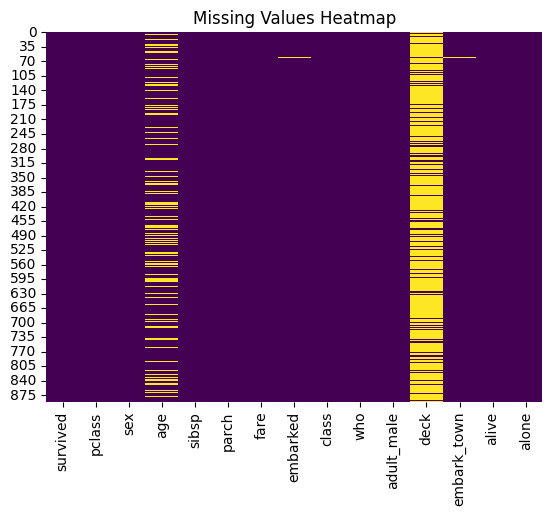

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Age Distribution

C:\Users\cps25\AppData\Local\Temp\ipykernel_27720\560256662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='age',


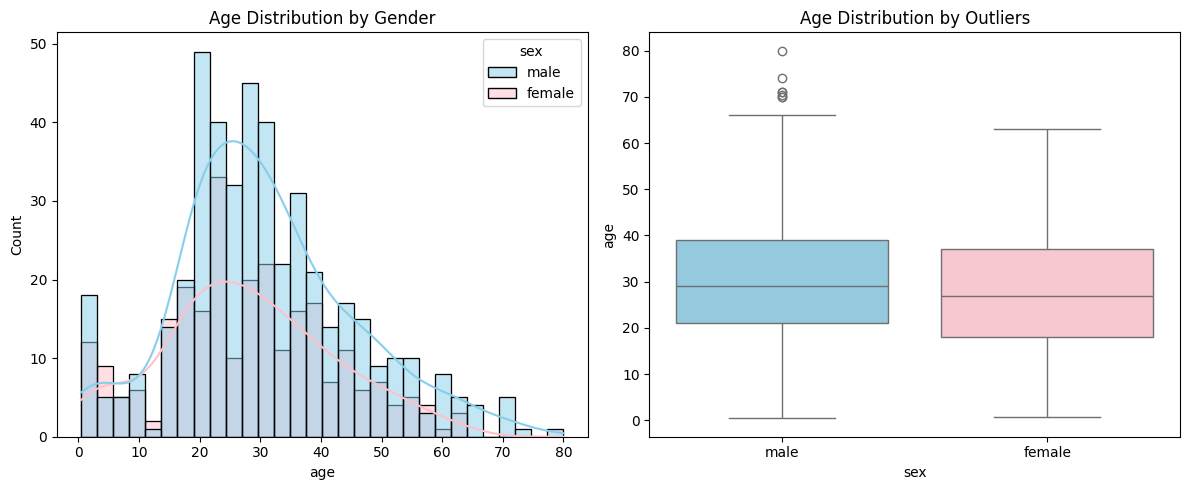

In [8]:
plt.figure(figsize=(12,5))

# Histogram + KDE
plt.subplot(121)
sns.histplot(data=df, x='age', kde=True, hue='sex', bins=30,
            palette={'male': 'skyblue', 'female': 'pink'})
plt.title('Age Distribution by Gender')

# Boxplot
plt.subplot(122)
sns.boxplot(data=df, x='sex', y='age',
            palette={'male': 'skyblue', 'female': 'pink'})
plt.title('Age Distribution by Outliers')

plt.tight_layout()
plt.show()

## Tỷ lệ sống sót

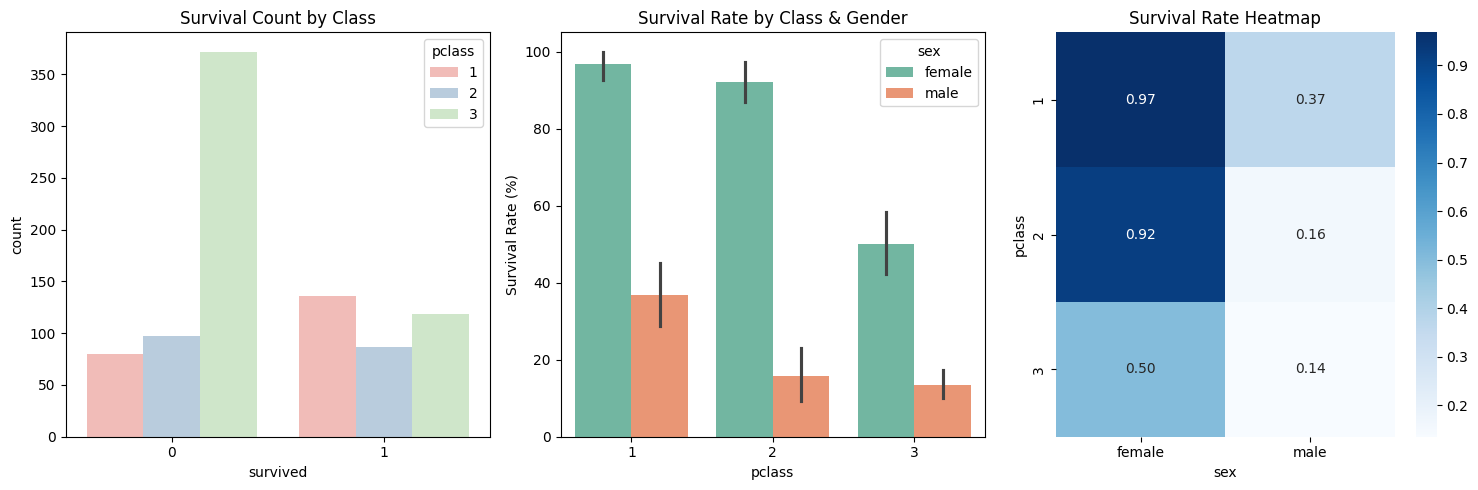

In [10]:
plt.figure(figsize=(15, 5))

# Countplot
plt.subplot(131)
sns.countplot(data=df, x='survived', hue='pclass',
                palette='Pastel1')
plt.title('Survival Count by Class')

# Barplot
plt.subplot(132)
sns.barplot(data=df, x='pclass', y='survived', hue='sex',
                estimator=lambda x: sum(x)/len(x)*100,
                palette='Set2')

plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Class & Gender')

# Cross-tab heatmap
heatmap_data = pd.crosstab(df['pclass'], df['sex'],
                            values=df['survived'], aggfunc='mean')

# heatmap
plt.subplot(133)
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f")
plt.title('Survival Rate Heatmap')

plt.tight_layout()
plt.show()

## Mối quan hệ Fare - Survival

C:\Users\cps25\AppData\Local\Temp\ipykernel_27720\936719129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='survived', y='fare',


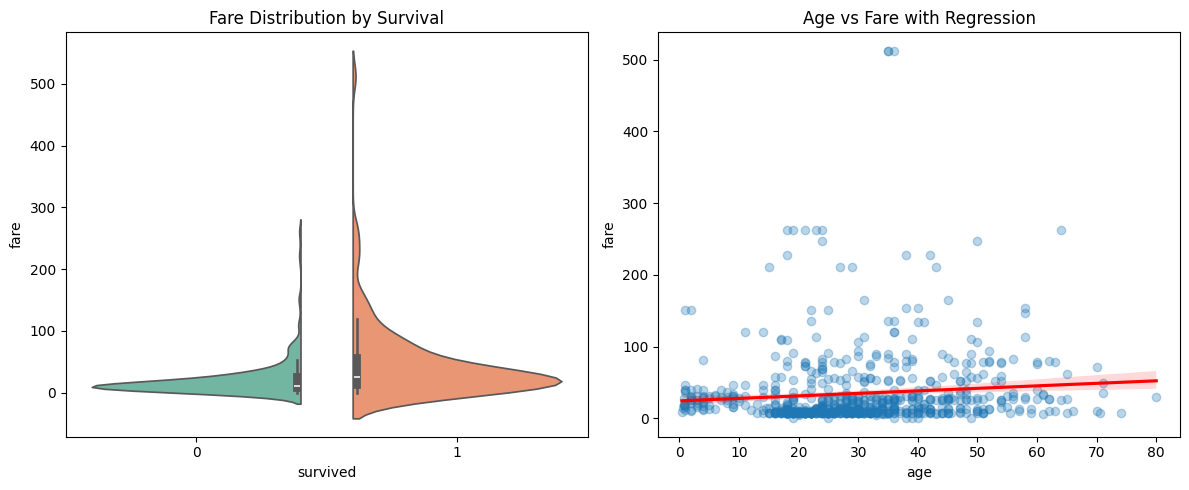

In [12]:
plt.figure(figsize=(12,5))

# Violinplot
plt.subplot(121)
sns.violinplot(data=df, x='survived', y='fare',
                palette='Set2', split=True)
plt.title('Fare Distribution by Survival')

# Scatterplot với regression line
plt.subplot(122)
sns.regplot(data=df, x='age', y='fare',
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
plt.title('Age vs Fare with Regression')

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [13]:
numerical_df = df.select_dtypes(include='number')

In [14]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
numerical_df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

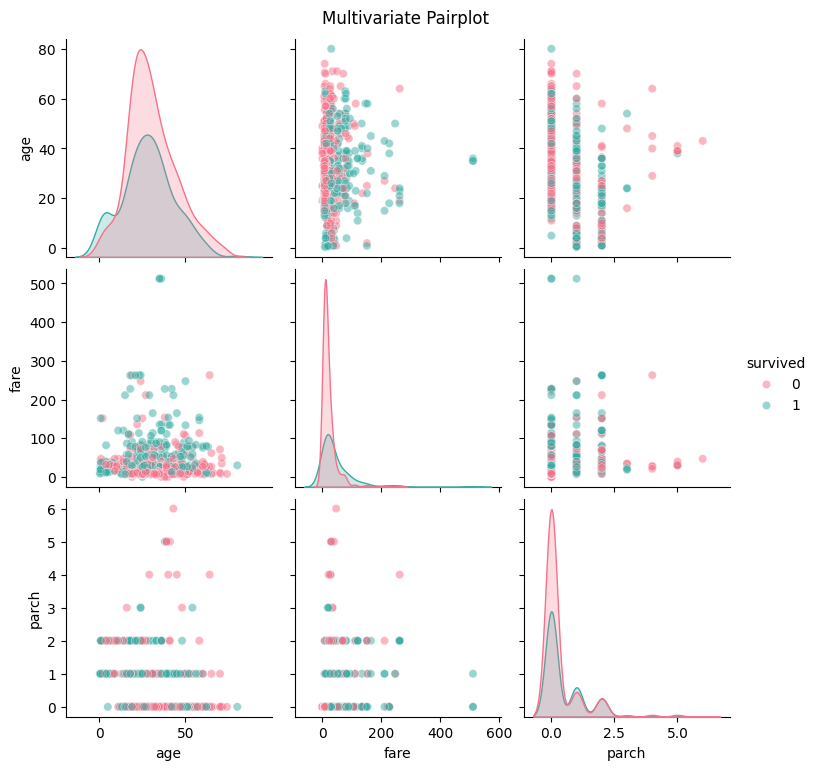

In [16]:
# Pairplot
sns.pairplot(data=numerical_df[['age', 'fare', 'parch', 'survived']],
            hue='survived',
            palette='husl',
            plot_kws={'alpha': 0.5})
plt.suptitle('Multivariate Pairplot', y=1.02)
plt.show()

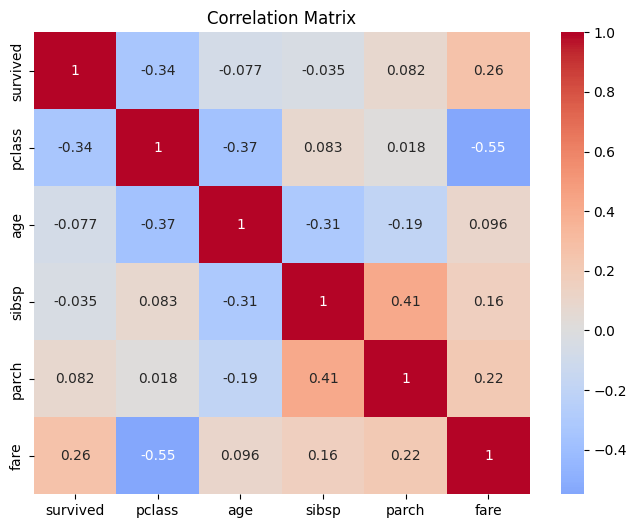

In [17]:
# Heatmap correlation
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()